## Titanic Project

### Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

### Load Dataset

In [9]:
df = sns.load_dataset('titanic')

### Check Data Types

In [11]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [15]:
{col: df[col].nunique() for col in df if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

### Changing Data Types

In [70]:
df = df.astype(
    {
        'alive': 'category',
        'sex': 'category',
        'embarked': 'category',
        'who': 'category',
        'embark_town': 'category'
    }
)

In [71]:
df.sex = df.sex.cat.codes
df.alive = df.alive.cat.codes

In [58]:
df.dtypes

survived          int64
pclass            int64
sex                int8
age             float64
sibsp             int64
parch             int64
fare            float64
embarked       category
class          category
who            category
adult_male         bool
deck           category
embark_town    category
alive              int8
alone              bool
dtype: object

### Check Correlations

In [73]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [110]:
df.corr(numeric_only=True).style.highlight_max(color='Green')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [112]:
df.drop(columns='alive')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


### Describe Data

In [114]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,alive
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


>  Dataset is reletively imbalanced!

In [117]:
sum(df.embark_town.str.get(0) == df.embarked) / df.shape[0]

0.9977553310886644

In [119]:
df.drop(columns='embark_town', inplace=True)

KeyError: "['embark_town'] not found in axis"

### Missing Values

In [123]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alive           0
alone           0
dtype: int64

### Sum Visualization Helps

<Axes: xlabel='None', ylabel='None'>

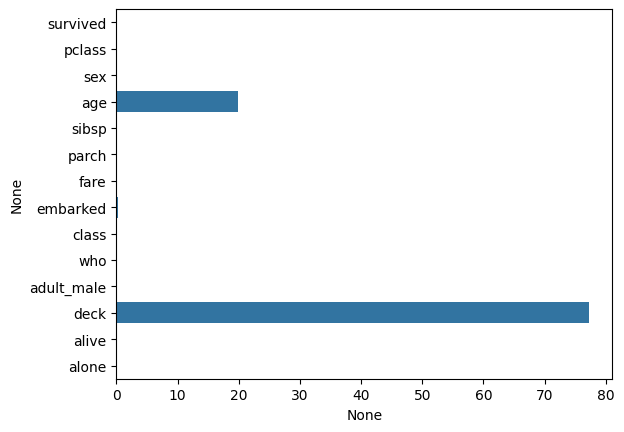

In [133]:
%matplotlib inline
sns.barplot(
    x= df.isna().sum() / df.shape[0] * 100 ,
    y= df.columns
)

In [134]:
%pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 724.9 kB/s eta 0:00:0000:0100:03
Note: you may need to restart the kernel to use updated packages.


<Axes: >

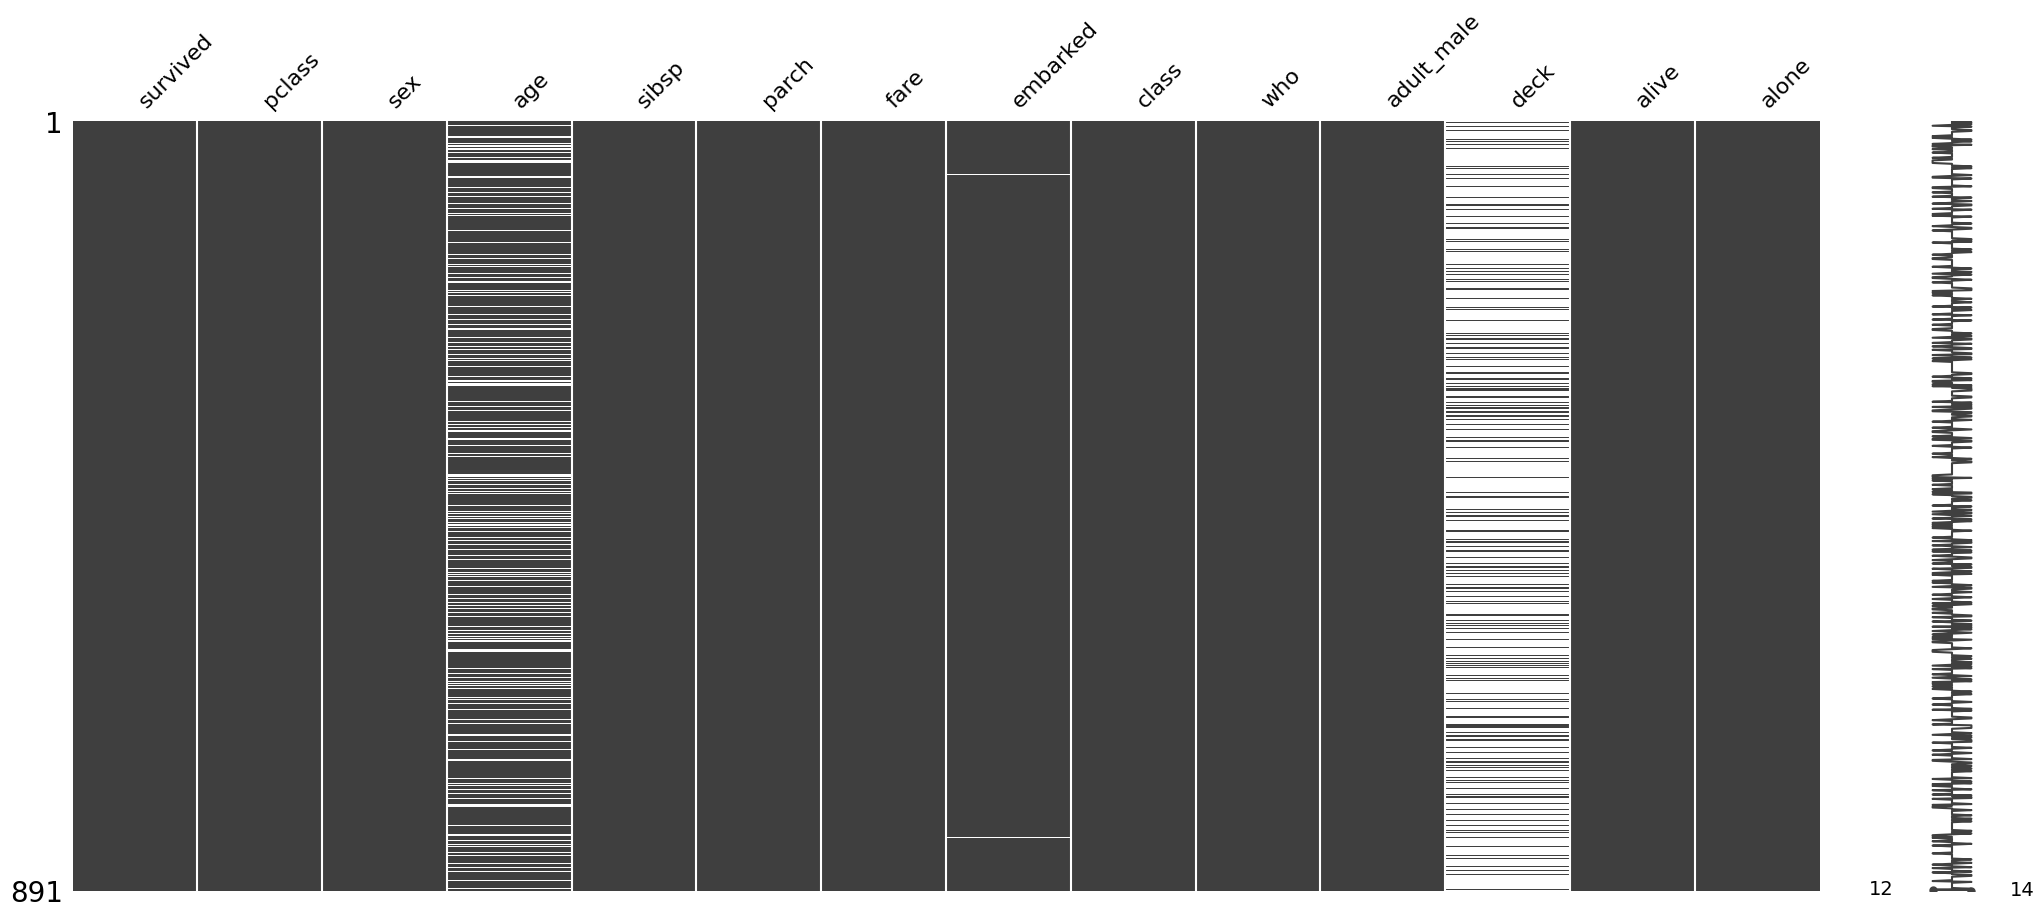

In [139]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

> Deck

In [140]:
df.drop(columns='deck', inplace=True)

> Age

In [142]:
df.groupby(['adult_male']).age.mean()

adult_male
False    24.932458
True     33.173123
Name: age, dtype: float64

In [144]:
df.groupby(['adult_male']).age.transform('mean')

0      33.173123
1      24.932458
2      24.932458
3      24.932458
4      33.173123
         ...    
886    33.173123
887    24.932458
888    24.932458
889    33.173123
890    33.173123
Name: age, Length: 891, dtype: float64

In [145]:
df.age.fillna(
    df.groupby(['adult_male']).age.transform('mean')
)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    24.932458
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [152]:
df['age_1']= df.age.fillna(
    df.groupby(['adult_male', 'alone']).age.transform('mean')
)

In [154]:
df.groupby(['adult_male', 'alone']).age.mean()

adult_male  alone
False       False    22.393350
            True     29.960396
True        False    33.722727
            True     32.973597
Name: age, dtype: float64

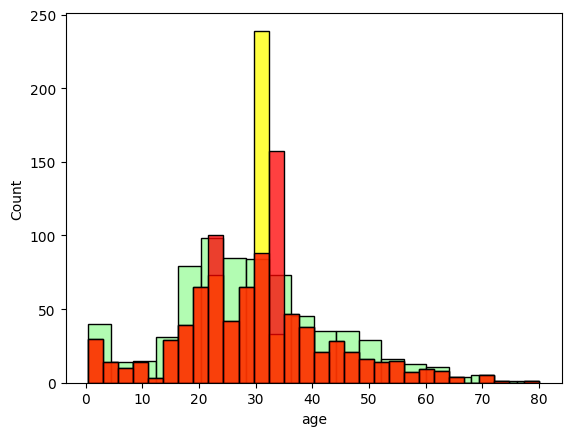

In [153]:
ax = sns.histplot(df.age, color='palegreen')
sns.histplot(df.age.fillna(df.age.mean()), ax=ax , color='yellow')
ax = sns.histplot(df.age_1, color='red')